In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B841-0E2D

 Directory of C:\Users\SANVI\Documents\ExelR Assignment\Random forest

30-04-2022  02.09 PM    <DIR>          .
30-04-2022  02.09 PM    <DIR>          ..
30-04-2022  02.07 PM    <DIR>          .ipynb_checkpoints
20-04-2022  09.47 PM            17,023 Company_Data.csv
20-04-2022  09.47 PM            21,837 Fraud_check.csv
20-04-2022  09.48 PM             1,378 problem statement(company data).txt
20-04-2022  09.48 PM               133 Problem_statement(Fraudcheck).txt
30-04-2022  01.55 PM         1,684,647 Random forest_company.ipynb
30-04-2022  02.09 PM             1,253 rf_companydata_sales.ipynb
30-04-2022  01.54 PM             1,262 small_tree.dot
30-04-2022  01.54 PM            26,686 tree.dot
               8 File(s)      1,754,219 bytes
               3 Dir(s)  101,783,748,608 bytes free


In [3]:
data = pd.read_csv("Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
len(data.Sales.unique())

336

In [6]:
data['Sales'] = pd.cut(np.array(data.Sales.values), 3, labels=["Low","Medium","High"])

In [7]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [13]:
data['ShelveLoc'] = data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [22]:
data = pd.get_dummies(data,columns=['Urban','US'], drop_first=True)

In [36]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,Medium,138,73,11,276,120,3,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,Medium,113,35,10,269,80,2,59,12,1,1
3,Medium,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,1,33,14,1,1
396,Medium,139,23,3,37,120,2,55,11,0,1
397,Medium,162,26,12,368,159,2,40,18,1,1
398,Medium,100,79,7,284,95,3,50,12,1,1


(array([247.,   0.,   0.,   0.,   0.,  51.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

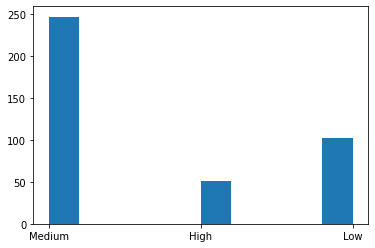

In [23]:
plt.hist(data['Sales'])

In [68]:
X=data.iloc[:,1:]
y=data['Sales']

In [69]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [57]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.33, random_state= 5)

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
model=RandomForestClassifier(n_estimators=100, max_features=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [60]:
y_pred

array(['Medium', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Low', 'High', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'L

In [61]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.7348484848484849

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       0.83      0.31      0.45        16
         Low       0.67      0.56      0.61        32
      Medium       0.75      0.88      0.81        84

    accuracy                           0.73       132
   macro avg       0.75      0.59      0.62       132
weighted avg       0.74      0.73      0.72       132



In [63]:
kfold =KFold(n_splits=10, shuffle =True, random_state =None)
model1 =RandomForestClassifier(n_estimators=100,max_features =3)
results=cross_val_score(model1,X,y, cv =kfold)

In [64]:
print(np.mean(results))

0.72


In [65]:
from sklearn.ensemble import BaggingClassifier

In [66]:
kfold1 =KFold(n_splits =10,shuffle =True,random_state=10)
model2=RandomForestClassifier(n_estimators =100,criterion ='entropy',max_features =3)
model3 =BaggingClassifier(base_estimator =model2,n_estimators =100,random_state =10)
results1 =cross_val_score(model3,X,y,cv=kfold1)

In [67]:
print(np.mean(results1))

0.7275
